In [238]:
# https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data

# Data Description:
## Dataset: Ultra-marathon race records registered between 1798 and 2022

## Total Records: Around 7 million

## Columns:

### Event Date: Date of the event

### Event Name: Name of the marathon

### Event Distance: Distance of the marathon (50-mile or 50KM)

### Athlete ID: Unique identifier for each athlete

### Athlete Performance Time: Performance time of the athlete

### Athlete Club: Club the athlete is affiliated with

### Athlete Country Code: Country code of the athlete

### Athlete Year of Birth: Year of birth of the athlete

### Athlete Gender: Gender of the athlete

### Athlete Age Group: Age group category

### Athlete Average Speed: Average speed during the marathon

## Data Cleaning:
### Removing Duplicates

### Handling Null Values

### Dropping extra columns

### Standardizing Data Formats

### Creating new columns for better analysis



## Data Filtering:
### Year Filter: Selected records specifically for the year 2022.

### Event Type Filter: Filtered data to include only 50 mi and 50 km events.

### Region Filter: Focused on US-based events and participants.

## Analysis Insights:
### Participation: Analysed the number of participants by event type, gender, and age group.

### Performance: Examined average performance times and speeds across different demographics.

### Trends: Identified trends and patterns in marathon participation and performance over the seasons.

### This thorough data cleaning and filtering process ensures accurate and meaningful insights from your marathon dataset, enabling detailed analysis and reporting.

In [239]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [240]:
df = pd.read_csv('Marathon_Races.csv')

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\3353652012.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Marathon_Races.csv')


In [241]:
df.head()


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [242]:
df.shape

(7117634, 13)

In [243]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

## Data Filtering
#### Get data of year 2022, with distance of 50mi or 50km  and USA events

In [245]:
df['Year of event'].unique()

array([2018, 2016, 2017, 2019, 2020, 2021, 2022, 1798, 1800, 1801, 1802,
       1805, 1807, 1809, 1837, 1861, 1863, 1870, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1884, 1885, 1887, 1888, 1889, 1891,
       1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1902, 1903,
       1904, 1906, 1907, 1908, 1909, 1910, 1911, 1913, 1914, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [246]:
df['Event distance/length'].unique()


array(['50km', '6h', '63.9km', ..., '185km/5Etappen', '83.1km',
       '137.5km/3Etappen'], dtype=object)

In [247]:
df[df['Event distance/length'] == '50km'].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [248]:
df[df['Event distance/length'] == '50mi'].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59


In [385]:
# Create the filters for year, distance, country and gender

yearFilter = df['Year of event'] == 2022
distanceFilter = df['Event distance/length'].isin(['50km', '50mi'])
eventFilter = df['Event name'].str.contains('USA')
genderFilter = df['Athlete gender'].isin(['M','F'])

In [386]:
# Filtered Data

df[yearFilter & distanceFilter & eventFilter & genderFilter].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36 h,"*Boston, MA",USA,1994.0,M,M23,10.194,839364
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24 h,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16 h,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49 h,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37 h,"*Washington, DC",USA,1997.0,M,M23,9.256,947348


In [388]:
# Dataframe with the filtered data

df2 = df[yearFilter & distanceFilter & eventFilter & genderFilter]
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36 h,"*Boston, MA",USA,1994.0,M,M23,10.194,839364
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24 h,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16 h,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49 h,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37 h,"*Washington, DC",USA,1997.0,M,M23,9.256,947348


## Data Cleaning

### Remove the USA from the Event name column

In [390]:

df2['Event name'].str.split('(').str.get(0)

3138208    Bel Monte 50 Mile Endurance Run 
3138209    Bel Monte 50 Mile Endurance Run 
3138210    Bel Monte 50 Mile Endurance Run 
3138211    Bel Monte 50 Mile Endurance Run 
3138212    Bel Monte 50 Mile Endurance Run 
                         ...               
3609801       Tussey Mountainback 50 Miler 
3609802       Tussey Mountainback 50 Miler 
3609803       Tussey Mountainback 50 Miler 
3609804       Tussey Mountainback 50 Miler 
3609805       Tussey Mountainback 50 Miler 
Name: Event name, Length: 59238, dtype: object

In [254]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

df2.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\3520276805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36 h,"*Boston, MA",USA,1994.0,M,M23,10.194,839364
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24 h,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16 h,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49 h,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37 h,"*Washington, DC",USA,1997.0,M,M23,9.256,947348


### Create Athlete Age

In [392]:
df2['Athlete Age'] = df2['Year of event'] - df2['Athlete year of birth']

df2.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\793082149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete Age'] = df2['Year of event'] - df2['Athlete year of birth']


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete Age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36 h,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,28.0
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24 h,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,32.0
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16 h,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,43.0
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49 h,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,28.0
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37 h,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,25.0


In [393]:
# Replace NA and inf values with 0
df2['Athlete Age'] = df2['Athlete Age'].replace([np.nan, np.inf, -np.inf], 0)

# Convert to int type
df2['Athlete Age'] = df2['Athlete Age'].astype(int)

df2.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\1312145146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete Age'] = df2['Athlete Age'].replace([np.nan, np.inf, -np.inf], 0)
C:\Users\maria\AppData\Local\Temp\ipykernel_30436\1312145146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete Age'] = df2['Athlete Age'].astype(int)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete Age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36 h,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,28
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24 h,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,32
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16 h,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,43
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49 h,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,28
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37 h,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,25


### Remove h from Athlete performance

In [259]:
df2['Athlete performance'].str.split(' ').str.get(0)

3138208     7:53:36
3138209     8:14:24
3138210     8:19:16
3138211     8:23:49
3138212     8:41:37
             ...   
3609801    11:16:08
3609802    11:27:05
3609803    11:46:34
3609804    11:55:29
3609805    12:14:15
Name: Athlete performance, Length: 59238, dtype: object

In [394]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

df2.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\464152941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete Age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,28
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,32
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,43
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,28
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,25


### Drop columns
### Athlete club, Athlete country, Athlete age category


In [262]:
df2.drop(['Athlete club', 'Athlete country', 'Athlete age category'], axis=1, inplace=True)

df2.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\575744046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Athlete club', 'Athlete country', 'Athlete age category'], axis=1, inplace=True)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete Age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,1994.0,M,10.194,839364,28
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,1990.0,M,9.765,366598,32
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,1979.0,M,9.67,553476,43
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,1994.0,M,9.583,807555,28
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,1997.0,M,9.256,947348,25


### Handle any null


In [264]:
df2.isnull().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete year of birth        1796
Athlete gender                  0
Athlete average speed           0
Athlete ID                      0
Athlete Age                     0
dtype: int64

In [265]:
df2 = df2.dropna()
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete Age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,1994.0,M,10.194,839364,28
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,1990.0,M,9.765,366598,32
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,1979.0,M,9.67,553476,43
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,1994.0,M,9.583,807555,28
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,1997.0,M,9.256,947348,25


In [266]:
df2.isnull().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete year of birth        0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete Age                  0
dtype: int64

In [267]:
df2.shape

(57442, 11)

### Check for duplicates


In [395]:
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete Age


In [396]:
df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete Age
0,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,28
1,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,32
2,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,43
3,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,28
4,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59233,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:16:08,"*Peachtree City, GA",USA,1968.0,M,M50,7.141,1044739,54
59234,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:27:05,"*Newport, PA",USA,1959.0,M,M60,7.027,50971,63
59235,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:46:34,"*Flemington, NJ",USA,1955.0,F,W65,6.833,73152,67
59236,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:55:29,"*Arlington, VA",USA,1965.0,M,M55,6.748,970133,57


### Update data type for Athlete average speed


In [398]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
Athlete Age                    int32
dtype: object

In [399]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

df2.dtypes

C:\Users\maria\AppData\Local\Temp\ipykernel_30436\673463190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)


Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed        float64
Athlete ID                     int64
Athlete Age                    int32
dtype: object

### Rename the columns


In [400]:
df2.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID',
       'Athlete Age'],
      dtype='object')

In [401]:
df2 = df2.rename(columns = {
    'Year of event' : 'year',
    'Event dates' : 'race_day',
    'Event name' : 'race_name',
    'Event distance/length' : 'race_length',
    'Event number of finishers' : 'race_no_of_finishers',
    'Athlete performance' : 'athlete_performance',
    'Athlete year of birth' : 'athlete_birth_year',
    'Athlete gender' : 'athlete_gender',
    'Athlete average speed' : 'athlete_avg_speed',
    'Athlete ID' : 'athlete_id',
    'Athlete Age' : 'athlete_age'    
})




In [402]:
df2.head()

,year,race_day,race_name,race_length,race_no_of_finishers,athlete_performance,Athlete club,Athlete country,athlete_birth_year,athlete_gender,Athlete age category,athlete_avg_speed,athlete_id,athlete_age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,7:53:36,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,28
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:14:24,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,32
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:19:16,"*Kannapolis, NC",USA,1979.0,M,M40,9.670,553476,43
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:23:49,"*Raleigh, NC",USA,1994.0,M,M23,9.583,807555,28
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run (USA),50mi,49,8:41:37,"*Washington, DC",USA,1997.0,M,M23,9.256,947348,25


### Reorder the columns

In [279]:
df3 = df2[['race_day', 'race_name', 'race_length', 'race_no_of_finishers', 'athlete_id', 'athlete_age', 'athlete_gender', 'athlete_performance', 'athlete_avg_speed']]

In [280]:
df3.head()

,race_day,race_name,race_length,race_no_of_finishers,athlete_id,athlete_age,athlete_gender,athlete_performance,athlete_avg_speed
3138208,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,28,M,7:53:36,10.194
3138209,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,32,M,8:14:24,9.765
3138210,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,43,M,8:19:16,9.670
3138211,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,28,M,8:23:49,9.583
3138212,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,25,M,8:41:37,9.256


### Create column age_bucket

In [404]:
def return_age_bucket(age):
    if age < 20:
        return 'Teenager(Below 20)'
    elif 20 <= age < 35:
        return 'Young(20-34)'
    elif 35 <= age < 50:
        return 'Adult(35-49)'
    elif 50 <= age < 65:
        return 'Middle-aged(50-64)'
    else: return 'Old(Over 65)'

df3['age_bucket'] = df3['athlete_age'].apply(return_age_bucket)

df3.head()

,race_day,race_name,race_length,race_no_of_finishers,athlete_id,athlete_age,athlete_gender,athlete_performance,athlete_avg_speed,age_bucket,race_month,race_season
3138208,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,28,M,7:53:36,10.194,Young(20-34),3,Spring
3138209,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,32,M,8:14:24,9.765,Young(20-34),3,Spring
3138210,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,43,M,8:19:16,9.670,Adult(35-49),3,Spring
3138211,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,28,M,8:23:49,9.583,Young(20-34),3,Spring
3138212,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,25,M,8:41:37,9.256,Young(20-34),3,Spring


In [323]:
df3['age_bucket'].unique()

array(['Young(20-34)', 'Adult(35-49)', 'Middle-aged(50-64)',
       'Old(Over 65)', 'Teenager(Below 20)'], dtype=object)

### Difference in speed for the 50km , 50mi male to female

In [283]:
df3.groupby(['race_length', 'athlete_gender'])['athlete_avg_speed'].mean()

race_length  athlete_gender
50km         F                 6.968553
             M                 7.564404
50mi         F                 6.776782
             M                 7.213734
Name: athlete_avg_speed, dtype: float64

In [405]:
# Group and calculate mean
grouped_data = df3.groupby(['race_length', 'athlete_gender'])['athlete_avg_speed'].mean().reset_index()

# Sort the data by 'athlete_avg_speed'
sorted_data = grouped_data.sort_values(by='athlete_avg_speed', ascending=False)

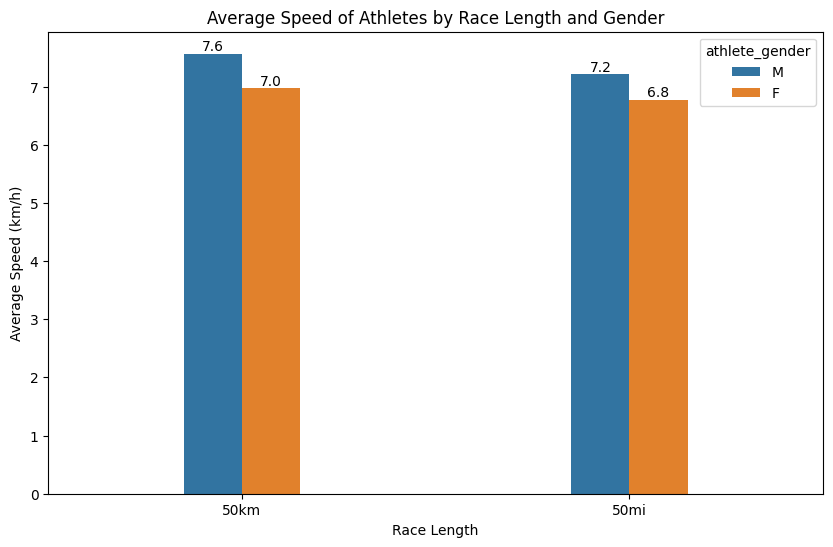

In [406]:
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=sorted_data,
    x='race_length',
    y='athlete_avg_speed',
    hue='athlete_gender',
    width=0.3
)

plt.title('Average Speed of Athletes by Race Length and Gender')
plt.xlabel('Race Length')
plt.ylabel('Average Speed (km/h)')

# Add data values on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge') 

plt.show()


## Observations:
### Gender Comparison: Male athletes consistently exhibit higher average speeds than female athletes across both race lengths.

### Race Distance: The difference in average speed between genders is slightly larger for the 50KM race compared to the 50-Mile race.

### What age groups are best

In [408]:
df3.groupby(['age_bucket', 'athlete_gender'])['athlete_avg_speed'].mean()

age_bucket          athlete_gender
Adult(35-49)        F                 6.930175
                    M                 7.533707
Middle-aged(50-64)  F                 6.511458
                    M                 7.041471
Old(Over 65)        F                 5.827754
                    M                 6.254798
Teenager(Below 20)  F                 6.771778
                    M                 7.686383
Young(20-34)        F                 7.308903
                    M                 7.821855
Name: athlete_avg_speed, dtype: float64

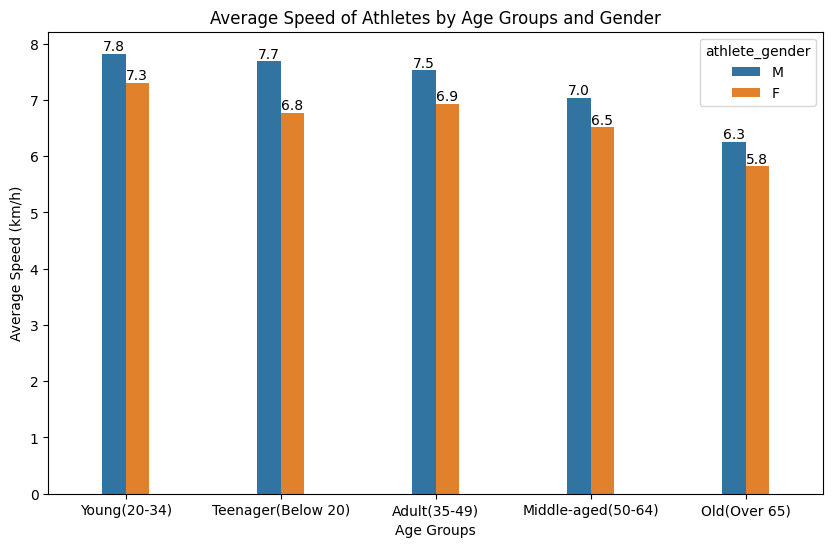

In [409]:
grouped_data = df3.groupby(['age_bucket', 'athlete_gender'])['athlete_avg_speed'].mean().reset_index()

# Sort the data by 'athlete_avg_speed'
sorted_data = grouped_data.sort_values(by='athlete_avg_speed', ascending=False)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=sorted_data,
    x='age_bucket',
    y='athlete_avg_speed',
    hue='athlete_gender',
    width=0.3
)

plt.title('Average Speed of Athletes by Age Groups and Gender')
plt.xlabel('Age Groups')
plt.ylabel('Average Speed (km/h)')

# Add data values on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge') 

# Show plo
plt.show()


## Observations:
### Gender Comparison: Male athletes consistently exhibit higher average speeds across all age groups compared to female athletes.

### Age-related Trends: There is a clear decline in average speed as age increases, with the most significant drop observed in the "Old" age group.

### Participants by race seasons and gender

In [410]:
# Get the race month
df3['race_month'] = df3['race_day'].str.split(".").str.get(1)


In [411]:
df3.head()

,race_day,race_name,race_length,race_no_of_finishers,athlete_id,athlete_age,athlete_gender,athlete_performance,athlete_avg_speed,age_bucket,race_month,race_season
3138208,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,28,M,7:53:36,10.194,Young(20-34),03,Spring
3138209,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,32,M,8:14:24,9.765,Young(20-34),03,Spring
3138210,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,43,M,8:19:16,9.670,Adult(35-49),03,Spring
3138211,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,28,M,8:23:49,9.583,Young(20-34),03,Spring
3138212,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,25,M,8:41:37,9.256,Young(20-34),03,Spring


In [354]:
df3.dtypes


race_day                 object
race_name                object
race_length              object
race_no_of_finishers      int64
athlete_id                int64
athlete_age               int32
athlete_gender           object
athlete_performance      object
athlete_avg_speed       float64
age_bucket               object
race_month               object
race_season              object
dtype: object

In [415]:
# Convert the race month to int
df3['race_month'] = df3['race_month'].astype(int)

df3.dtypes

race_day                 object
race_name                object
race_length              object
race_no_of_finishers      int64
athlete_id                int64
athlete_age               int32
athlete_gender           object
athlete_performance      object
athlete_avg_speed       float64
age_bucket               object
race_month                int32
race_season              object
dtype: object

In [414]:
df3['race_month'].unique

<bound method Series.unique of 3138208     3
3138209     3
3138210     3
3138211     3
3138212     3
           ..
3609801    10
3609802    10
3609803    10
3609804    10
3609805    10
Name: race_month, Length: 57442, dtype: int32>

In [416]:
# Generate the races seasons
def get_season(month):
    if month >= 3 and month <= 5:
        return "Spring"
    elif month >= 6 and month <= 8:
        return "Summer"
    elif month >= 9 and month <= 11:
        return "Fall"
    elif month == 12 or (month >= 1 and month <= 2):
        return "Winter"


df3['race_season'] = df3['race_month'].apply(get_season)

df3.head(5)

,race_day,race_name,race_length,race_no_of_finishers,athlete_id,athlete_age,athlete_gender,athlete_performance,athlete_avg_speed,age_bucket,race_month,race_season
3138208,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,28,M,7:53:36,10.194,Young(20-34),3,Spring
3138209,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,32,M,8:14:24,9.765,Young(20-34),3,Spring
3138210,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,43,M,8:19:16,9.670,Adult(35-49),3,Spring
3138211,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,28,M,8:23:49,9.583,Young(20-34),3,Spring
3138212,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,25,M,8:41:37,9.256,Young(20-34),3,Spring


In [362]:
df3.groupby(['race_season', 'race_length'])['athlete_avg_speed'].mean()

race_season  race_length
Fall         50km           7.287608
             50mi           7.388951
Spring       50km           7.366143
             50mi           7.133858
Summer       50km           7.126663
             50mi           6.819675
Winter       50km           7.827791
             50mi           7.448442
Name: athlete_avg_speed, dtype: float64

In [376]:
df3.groupby(['race_season', 'athlete_gender'])['athlete_id'].count()

race_season  athlete_gender
Fall         F                  5438
             M                 11449
Spring       F                  5980
             M                 11214
Summer       F                  3920
             M                  7527
Winter       F                  2801
             M                  5973
Name: athlete_id, dtype: int64

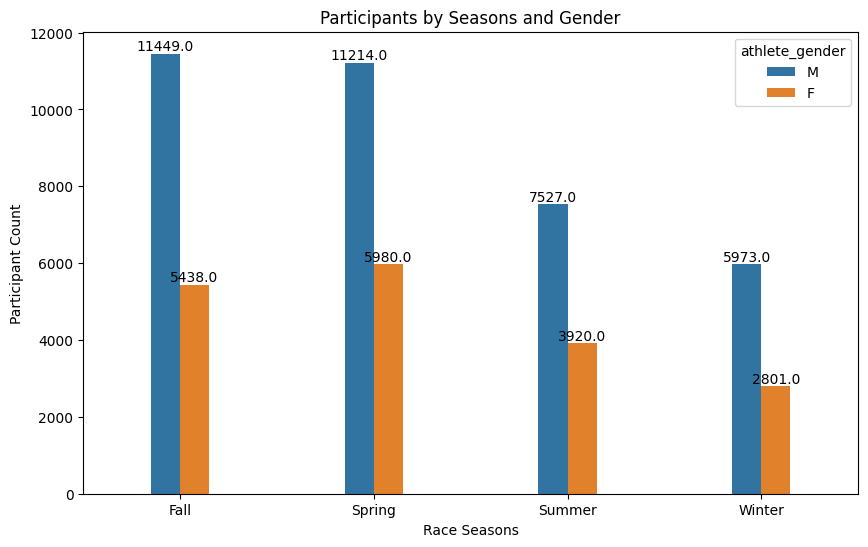

In [383]:
grouped_data = df3.groupby(['race_season', 'athlete_gender'])['athlete_id'].count().reset_index()

# Rename the columns for better understanding
grouped_data.columns = ['race_season', 'athlete_gender', 'athlete_count']

# Sort the data by 'athlete_count'
sorted_data = grouped_data.sort_values(by='athlete_count', ascending=False)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=sorted_data,
    x='race_season',
    y='athlete_count',
    hue='athlete_gender',
    width=0.3
)

plt.title('Participants by Seasons and Gender')
plt.xlabel('Race Seasons')
plt.ylabel('Participant Count')

# Add data values on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge') 

# Show plot
plt.show()

## Observations:
### Gender Comparison: Male participants consistently outnumber female participants in all seasons.

### Seasonal Trends: Fall and spring seasons have the highest participation rates, indicating favorable conditions and possibly more event availability during these times.

### Lowest Participation: Winter shows the lowest participation, likely due to weather conditions that may make racing less appealing.

# Conclusion:
### These insights collectively reveal important trends in marathon participation and performance:

### Performance Trends: Male athletes generally perform better in terms of average speed across all race lengths, age groups, and seasons. The age group of 20-34 years shows peak performance, while performance declines with age, especially after 65 years.

### Participation Trends: Participation is highest in the fall and spring seasons, indicating a preference for milder weather conditions. Winter shows the lowest participation, likely due to colder temperatures.

### Gender Dynamics: Across all observations, male athletes not only participate in higher numbers but also exhibit better performance metrics compared to female athletes. This suggests that tailored training programs could help bridge the performance gap.

## These observations and conclusions can guide future event planning, training programs, and marketing strategies to enhance participation and performance in marathons.